In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv("Twitch_game_data.csv")

In [47]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [48]:
df.columns = ['Ranque', 'Jogo' ,'Mes', 'Ano', 'Horas_observadas', 'Horas_transmitidas','Pico_de_espectadores','Pico_de_canais', 'Streamers', 'Telespectadores_avg', 'Canais_avg','lação_de_visualização_avg']

In [49]:
df.head()

,Ranque,Jogo,Mes,Ano,Horas_observadas,Horas_transmitidas,Pico_de_espectadores,Pico_de_canais,Streamers,Telespectadores_avg,Canais_avg,lação_de_visualização_avg
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [50]:
df_cs = df[ df['Jogo'] == 'Counter-Strike: Global Offensive']

In [51]:
cs = df_cs.groupby('Ano')[['Horas_observadas']].sum().reset_index()

In [52]:
cs

,Ano,Horas_observadas
0,2016,526391918
1,2017,419802259
2,2018,401775324
3,2019,457874735
4,2020,713749581
5,2021,401929394


Text(0, 0.5, 'Horas  obsevadas')

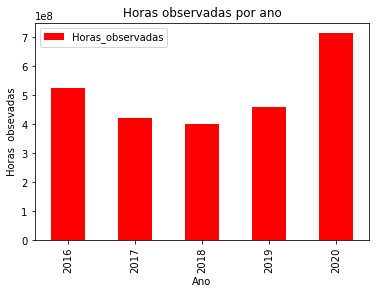

In [53]:
ax = cs[0:5].plot(x ='Ano', y ='Horas_observadas', kind ='bar', color = 'red')

ax.set_title('Horas observadas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Horas  obsevadas')

In [54]:
df_cs2020 = df_cs[ df_cs['Ano'] == 2020]

Text(0, 0.5, 'Horas observadas (milhoões)')

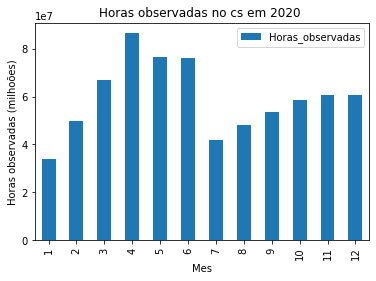

In [55]:
ax = df_cs2020.plot(x = 'Mes', y = 'Horas_observadas', kind ='bar', title = 'Horas observadas no cs em 2020 ')
ax.set_ylabel('Horas observadas (milhoões)')

In [56]:
df['Horas_transmitidas'] = df['Horas_transmitidas'].apply(lambda x: x.replace( ' hours', ''))
df['Horas_transmitidas'] = df['Horas_transmitidas'].astype(int)

In [57]:
df_jogos_horas = df.groupby('Jogo').agg({
        'Horas_observadas': np.sum
        , 'Horas_transmitidas': np.sum
    }).reset_index()

In [58]:
df_jogos_horas.head()

,Jogo,Horas_observadas,Horas_transmitidas
0,.hack//G.U. Last Recode,145350,35258
1,60 Parsecs!,529688,1867
2,60 Seconds!,2834105,9208
3,7 Days to Die,53420415,4767018
4,<U+014C>kami,181539,19273


In [65]:
df_jogos_horas1 = df_jogos_horas[ df_jogos_horas.Jogo != 'Just Chatting'].sort_values(by='Horas_observadas', ascending=False).head(10)
df_jogos_horas1

,Jogo,Horas_observadas,Horas_transmitidas
737,League of Legends,6664611934,132479023
499,Fortnite,4143704994,275193901
233,Counter-Strike: Global Offensive,2921523211,59889156
559,Grand Theft Auto V,2767974487,50044009
354,Dota 2,2698350543,29501709
600,Hearthstone,1934218330,11948505
1627,World of Warcraft,1644337720,55315190
986,PLAYERUNKNOWN'S BATTLEGROUNDS,1475296705,53666554
183,Call of Duty: Warzone,1419531059,79663641
861,Minecraft,1376338454,58869759


Text(0, 0.5, 'Horas observadas (milhoões)')

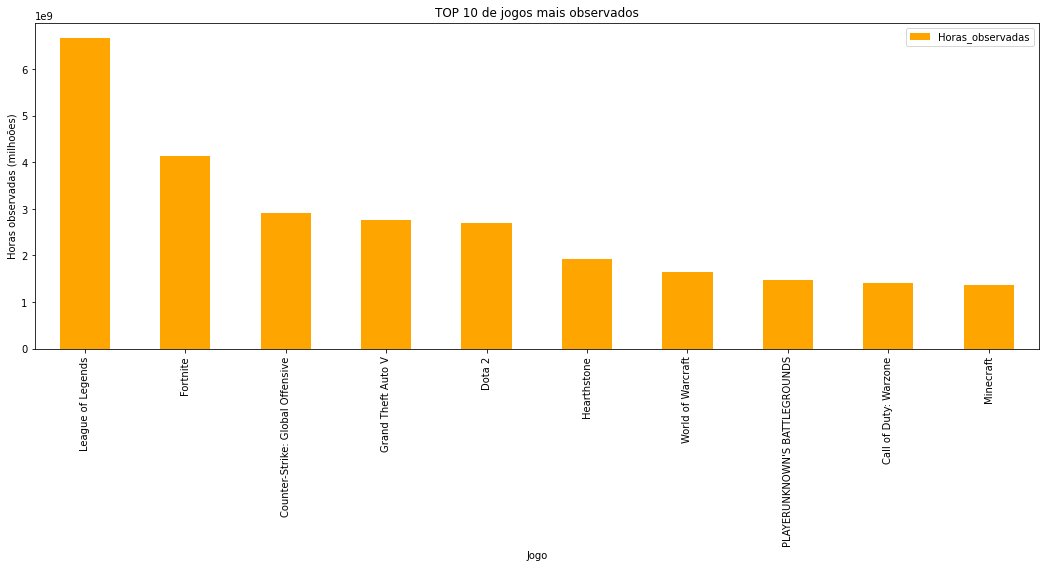

In [60]:
ax = df_jogos_horas1.plot(
    x = 'Jogo',
    y = 'Horas_observadas',
    color = 'orange',
    kind = 'bar',
    figsize = (18, 6)
)

ax.set_title('TOP 10 de jogos mais observados')
ax.set_ylabel('Horas observadas (milhoões)')



In [61]:
df_jogos_horas_transmitidas = df_jogos_horas[ df_jogos_horas.Jogo != 'Just Chatting'].sort_values(by='Horas_transmitidas', ascending=False).head(10)


Text(0, 0.5, 'Horas observadas (milhoões)')

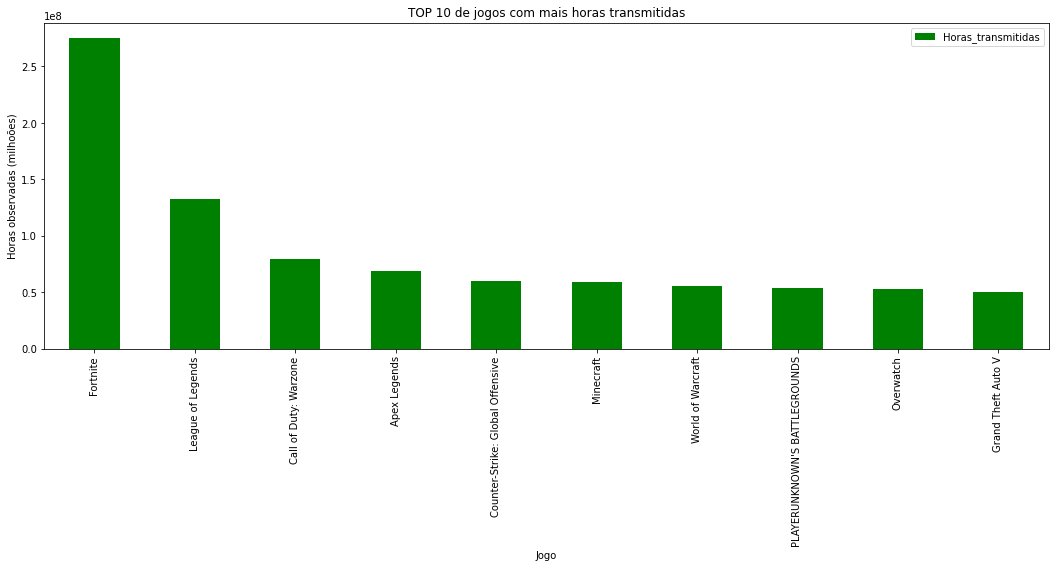

In [62]:
ax = df_jogos_horas_transmitidas.plot(
    x = 'Jogo',
    y = 'Horas_transmitidas',
    color = 'green',
    kind = 'bar',
    figsize = (18, 6)
)

ax.set_title('TOP 10 de jogos com mais horas transmitidas')
ax.set_ylabel('Horas observadas (milhoões)')



In [64]:
#Jogo mais visto em u
num_id = df['Horas_observadas'].idxmax()
df.loc[num_id]

Ranque                               1
Jogo                          VALORANT
Mes                                  4
Ano                               2020
Horas_observadas             344551979
Horas_transmitidas             4588347
Pico_de_espectadores           1728977
Pico_de_canais                   15710
Streamers                       319709
Telespectadores_avg             479209
Canais_avg                        6381
lação_de_visualização_avg        75.09
Name: 10200, dtype: object

In [ ]:
num_id = df_jogos_horas['Horas_observadas'].idxmin()
df_jogos_horas.loc[num_id]

In [ ]:
num_id = df_jogos_horas['Horas_transmitidas'].idxmax()
df_jogos_horas.loc[num_id]

In [ ]:
num_id = df_jogos_horas['Horas_transmitidas'].idxmin()
df_jogos_horas.loc[num_id]